# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


---

**Баллы за задание:**

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (учитывается только в основной части курса, необходимо на "отл"):
* Задача 1 &mdash; 70 баллов

<b><a href="#Факультативная-часть" style="text-decoration: none;"><font color="green">Факультативная часть</font></a></b> (учитывается только в факультативной части курса):
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов

**Внимание!** Указанные баллы являются бонусными. Они не учитываются в максимальных суммах баллов в знаменателе при вычислении процента выполненных заданий. Но все полученные вами баллы будут учтены в числителе. Тем самым, выполняя или не выполняя домашку, вы не сможете понизить оценку, но сможете ее повысить.

In [1]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import ast
from forex_python.converter import CurrencyRates
import folium
from IPython.display import IFrame

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

**Внимание!**
В первую очередь задание призвано помочь вам понять, какие навыки стоит развивать, и может быть даже выбрать подходящую кафедру. Однако, не стоит идти на работу/стажировку раньше времени. Даже только летнюю, абсолютное большинство людей не могут работать круглый год без перерыва. У всех из вас 3 курс достаточно нагруженный, а на DS-потоке нагрузка с первой недели сентября. И если вы идете на стажировку, то каникул у вас может просто не остаться. Даже если вам сейчас/летом/в сентябре кажется "я же справлюсь", к ноябрю-декабрю с большой вероятностью вы выдохнетесь. Таких примеров *очень много*. Не все, кто-то успешно справляется совмещать работу и учебу, но таких *очень мало*. Берегите себя и свое здоровье :)

---

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [3]:
URL = "https://api.hh.ru/vacancies"

params = {
    "text": "Data Scientist",
    "area": 1,
    "page": 0,
    "per_page": 100,
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [4]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [5]:
data["items"][0]

{'id': '98612984',
 'premium': False,
 'name': 'Petroleum Engineer (Baku)',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-08T13:10:45+0300',
 'created_at': '2024-05-08T13:10:45+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=98612984',
 'show_logo_in_search': None,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/98612984?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/98612984',
 'relations': [],
 'employer': {'id': '1068',
  'name': 'Cornerstone Russia',
  'url': 'https://api.hh.ru/employers/1068',
  'alternate_url': 'https://hh.ru/employer/1068',
  'logo_urls': {'240': 'https://img.hhcdn.ru/employer-logo/1643847.jpeg',
   'original': 'https://img

Сколько всего найдено вакансий

In [6]:
data["found"]

352

Количество страниц в результатах поиска

In [7]:
data["pages"]

4

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [8]:
df = pd.json_normalize(data["items"])
df.head()

,id,premium,name,department,has_test,response_letter_required,salary,address,response_url,sort_point_distance,...,address.metro.line_id,address.metro.lat,address.metro.lng,branding.type,branding.tariff,employer.logo_urls,department.id,department.name,insider_interview.id,insider_interview.url
0,98612984,False,Petroleum Engineer (Baku),NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98594437,False,Data Scientist,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98592181,False,Аналитик данных/Junior DATA SCIENTIST,NaN,False,False,NaN,NaN,None,None,...,4,55.740544,37.534100,MAKEUP,None,NaN,NaN,NaN,NaN,NaN
3,97821551,False,Chief data officer,NaN,False,False,NaN,NaN,None,None,...,2,55.706634,37.657008,MAKEUP,None,NaN,NaN,NaN,NaN,NaN
4,97615359,False,Junior Data Scientist / Младший аналитик данных,NaN,False,False,NaN,NaN,None,None,...,NaN,NaN,NaN,MAKEUP,None,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [9]:
vacancy = df["id"].iloc[0]
vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [10]:
vacancy_info

{'id': '98612984',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Petroleum Engineer (Baku)',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'fullDay', 'name': 'Полный день'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<p><strong>PE Specialist will be working with Data Scientists to solve complex Petroleum Engineering problems by development of digital solutions and automation techniques.</strong></p> <p><strong>Responsibilities for this position may include but are not limited to:</strong></p> <ul> <li> <p>Performing Inflow Performance Relationship (IPR) analysis;</p> </li> <li> <

---

### <font color="orange"><i>Сложная часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [11]:
URL = 'https://api.hh.ru/vacancies'
per_page = 100

all_data = []

names_of_vacancy = ['Специалист по анализу данных',
                    'Аналитик данных',
                    'Специалист по машинному обучению',
                    'Data Scientist',
                    'Machine Learning Engineer'
                    ]

for vacancy_name in names_of_vacancy:
  params = {
      'text': vacancy_name,
      'area': 1,
      'page': 0,
      "per_page": per_page,
  }

  req = requests.get(URL, params)
  data = json.loads(req.content.decode())

  found = data['found']
  pages = data['pages']

  print(f'{vacancy_name} found: {found}, pages: {pages}')

  for page in range(pages):
    params = {
      'text': vacancy_name,
      'area': 1,
      'page': page,
      "per_page": per_page,
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())

    vacancies = data.get('items', [])
    all_data.extend(vacancies)
df = pd.DataFrame(all_data)
df.to_csv('data.csv', index=False)

Специалист по анализу данных found: 4038, pages: 20
Аналитик данных found: 8990, pages: 20
Специалист по машинному обучению found: 650, pages: 7
Data Scientist found: 352, pages: 4
Machine Learning Engineer found: 110, pages: 2


In [12]:
print(len(df))

5112


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [13]:
df_load = pd.read_csv('data.csv')
unique_df = df_load.drop_duplicates(subset=['id'])
deleted_df = unique_df.dropna(subset=['salary'])
print(f'final len: {len(deleted_df)}')
deleted_df.head()

final len: 1783


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding
0,97294573,False,"Специалист по тендерам по 44ФЗ, 223ФЗ, 615-П (...",NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 20000, 'to': 75000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],True,"[{'id': '119', 'name': 'Специалист по тендерам'}]",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'part', 'name': 'Частичная занятость'}",NaN,False,NaN,NaN
1,98489422,False,Веб-аналитик (обучим сами),NaN,False,True,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 50000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],True,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
3,98072369,False,Специалист по работе с данными EXCEL,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': 120000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Калининская лини...",...,[],False,"[{'id': '10', 'name': 'Аналитик'}]",False,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
4,98465024,False,Стажер-разработчик Python,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 10000, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",NaN,...,"[{'id': 'start_after_sixteen', 'name': 'Можно ...",False,"[{'id': '96', 'name': 'Программист, разработчи...",True,"{'id': 'noExperience', 'name': 'Нет опыта'}","{'id': 'probation', 'name': 'Стажировка'}",NaN,False,NaN,NaN
6,97928304,False,Генеральный директор (удаленно),NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 300000, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],False,"[{'id': '26', 'name': 'Генеральный директор, и...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [14]:
def extract_salary(row):
    return pd.Series([ast.literal_eval(row)['from'], ast.literal_eval(row)['to'], ast.literal_eval(row)['currency']])

def extract_address(row):
    return pd.Series([ast.literal_eval(row)['lat'], ast.literal_eval(row)['lng']])


In [15]:
use = deleted_df[['id', 'name', 'salary', 'schedule', 'employment']].copy()
use[['from', 'to', 'currency']] = use['salary'].apply(lambda x: extract_salary(x))
use.drop(['salary'], axis=1, inplace=True)
use_for_analyze = use.reset_index(drop=True)
use_for_analyze.head()

,id,name,schedule,employment,from,to,currency
0,97294573,"Специалист по тендерам по 44ФЗ, 223ФЗ, 615-П (...","{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'part', 'name': 'Частичная занятость'}",20000.0,75000.0,RUR
1,98489422,Веб-аналитик (обучим сами),"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",50000.0,50000.0,RUR
2,98072369,Специалист по работе с данными EXCEL,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",120000.0,120000.0,RUR
3,98465024,Стажер-разработчик Python,"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'probation', 'name': 'Стажировка'}",NaN,10000.0,RUR
4,97928304,Генеральный директор (удаленно),"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",300000.0,NaN,RUR


**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [16]:
df_add_cl = deleted_df.dropna(subset=['address'])
df1 = df_add_cl[['id', 'name', 'salary', 'address', 'schedule', 'employment']].copy()
df1[['from', 'to', 'currency']] = df1['salary'].apply(lambda x: extract_salary(x))
df1[['lat', 'lng']] = df1['address'].apply(lambda x: extract_address(x))
df1.drop(['salary'], axis=1, inplace=True)
df_analyse = df1.reset_index(drop=True)
df_analyse.to_excel('vacancy_data_science.xlsx', index=False)

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [17]:
len(use_for_analyze)

1783

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [18]:
key_skills = []
schedules = []

for i in tqdm(range(len(use_for_analyze))):
  vacancy = use_for_analyze['id'].iloc[i]
  vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"
  req = requests.get(vacancy_url)
  vacancy_info = json.loads(req.content.decode())
  if 'key_skills' in vacancy_info:
    key_skills.append(vacancy_info['key_skills'])
  if 'schedule' in vacancy_info:
    schedules.append(vacancy_info['schedule'])
  sleep(0.05)

100%|██████████| 1783/1783 [05:29<00:00,  5.41it/s]


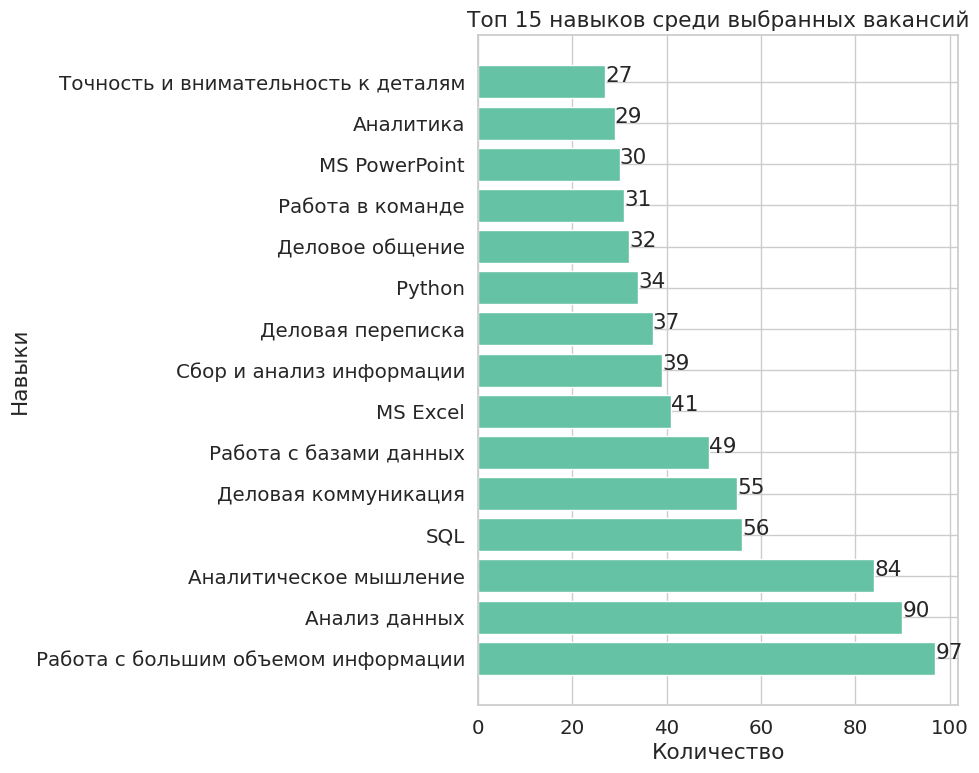

In [19]:
dicts = {}
for cur_skills in key_skills:
  if cur_skills == None:
    continue
  for skill in cur_skills:
    skill_name = skill['name']
    dicts[skill_name] = dicts.get(skill_name, 0) + 1
top_15 = sorted(dicts.items(), key=lambda x: x[1], reverse=True)[:15]
keys = []
values = []
for key, val in top_15:
  keys.append(key)
  values.append(val)
plt.figure(figsize=(10, 8))
bars = plt.barh(keys, values)
plt.xlabel('Количество')
plt.ylabel('Навыки')
plt.title('Топ 15 навыков среди выбранных вакансий')
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{values[i]}')
plt.tight_layout()
plt.show()

Исходя из графика можно cделать выводы о наиболее ценных навыках у работодателя по направлению data science:\
### в топе:
1) аналитика/анализ данных
2) sql
3) манеры:)

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

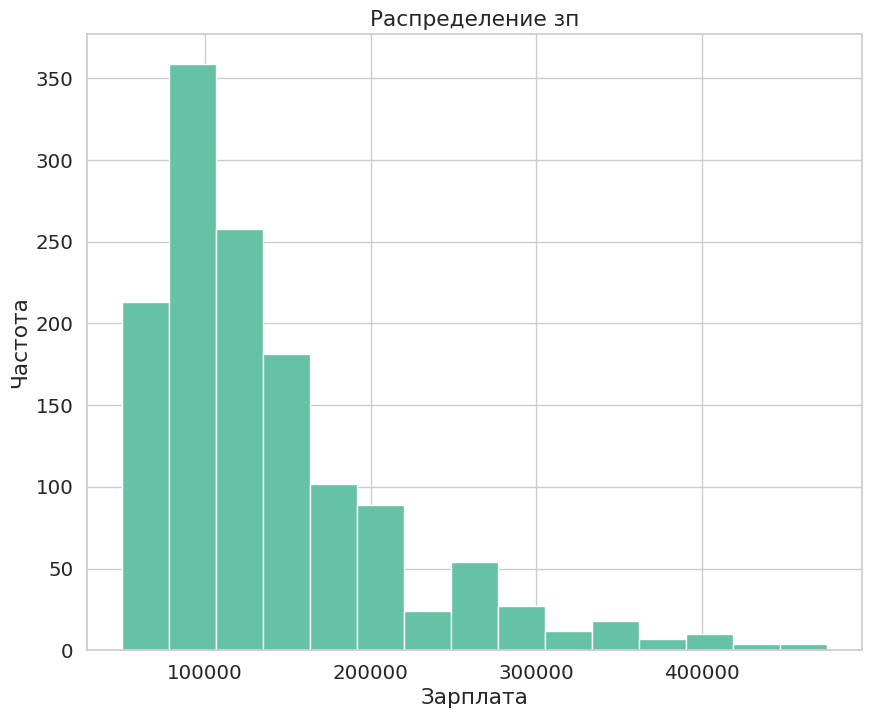

In [20]:
df2 = use_for_analyze.dropna(subset=['from', 'currency']).copy()
df2['salary'] = df2.apply(lambda row: (row['from'] + row['to']) / 2 if pd.notnull(row['to']) and pd.notnull(row['from']) else row['from'] if pd.notnull(row['from']) else row['to'], axis=1)
df_with_salary = df2.dropna(subset=['salary']).copy()
df_filtr = df_with_salary[(df_with_salary['salary'] > 50_000) & (df_with_salary['salary'] < 500_000)]
plt.figure(figsize=(10, 8))
plt.hist(df_filtr['salary'], bins=15)
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Распределение зп')
plt.grid(True)
plt.show()

Из графика можно увидеть, что основная часть вакансий находится в пределе до 200 тыс. руб, те для начинающих специалистов есть возможность устроится, а вот уже для опытных не так много предложений.

**Вопрос 4.** Какой формат работы предлагается (в офисе / удаленно / ...)?

In [21]:
dict = {}
for cur in schedules:
  if cur == None:
    continue
  id = cur['id']
  dict[id] = dict.get(id, 0) + 1
top = sorted(dict.items(), key=lambda x: x[1], reverse=True)
shedule = len(top)
keys = []
values = []
for key, val in top:
  print(key)
  keys.append(key)
  values.append(val)

fullDay
remote
shift
flexible
flyInFlyOut


Можно сделать выводы, что доступны почти все виды работы.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [22]:
URL = 'https://api.hh.ru/vacancies'
per_page = 100
all_data = []
names_of_vacancy = ['Программист на Go',
                    'Инженер по разработке на Go',
                    'Go разработчик',
                    'Go программист',
                    'Специалист по разработке на Go',
                    'Программный инженер на Go',
                    'Go Programmer',
                    'Go Software Developer',
                    'Go Engineer',
                    'Go Application Developer',
                    'Go Systems Developer',
                    'Go Application Engineer',
                    'Go Development Engineer',
                    ]

for vacancy_name in names_of_vacancy:
  params = {
      'text': vacancy_name,
      'area': 1,
      'page': 0,
      "per_page": per_page,
  }

  req = requests.get(URL, params)
  data = json.loads(req.content.decode())

  found = data['found']
  pages = data['pages']

  print(f'{vacancy_name} found: {found}, pages: {pages}')

  for page in range(pages):
    params = {
      'text': vacancy_name,
      'area': 1,
      'page': page,
      "per_page": per_page,
    }

    req = requests.get(URL, params)
    data = json.loads(req.content.decode())

    vacancies = data.get('items', [])
    all_data.extend(vacancies)
df = pd.DataFrame(all_data)
df.to_csv('data_dev.csv', index=False)

Программист на Go found: 896, pages: 9
Инженер по разработке на Go found: 399, pages: 4
Go разработчик found: 896, pages: 9
Go программист found: 896, pages: 9
Специалист по разработке на Go found: 260, pages: 3
Программный инженер на Go found: 82, pages: 1
Go Programmer found: 896, pages: 9
Go Software Developer found: 29, pages: 1
Go Engineer found: 473, pages: 5
Go Application Developer found: 32, pages: 1
Go Systems Developer found: 44, pages: 1
Go Application Engineer found: 17, pages: 1
Go Development Engineer found: 416, pages: 5


In [23]:
df_load = pd.read_csv('data_dev.csv')
unique_df = df_load.drop_duplicates(subset=['id'])
deleted_df = unique_df.dropna(subset=['salary'])
print(f'final len: {len(deleted_df)}')
deleted_df.head()

final len: 228


,id,premium,name,department,has_test,response_letter_required,area,salary,type,address,...,working_time_modes,accept_temporary,professional_roles,accept_incomplete_resumes,experience,employment,adv_response_url,is_adv_vacancy,adv_context,branding
0,98565084,False,Frontend Javascript разработчик,NaN,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 120000, 'to': 180000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}","{'city': 'Москва', 'street': 'Большая Новодмит...",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
1,98013927,False,Javascript Frontend Developer Middle (офис 5/2),"{'id': '65-65-domo', 'name': 'Московский аэроп...",False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': None, 'to': 190000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}","{'city': 'городской округ Домодедово', 'street...",...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,"{'type': 'MAKEUP', 'tariff': None}"
3,98188460,False,No-code Developer / Junior/Middle в AI студию ...,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 52052, 'to': 100052, 'currency': 'RUR...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],True,"[{'id': '96', 'name': 'Программист, разработчи...",True,"{'id': 'between1And3', 'name': 'От 1 года до 3...","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
4,98488617,False,Senior Golang Developer,NaN,True,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 700000, 'to': 850000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN
6,98611300,False,Golang разработчик,NaN,False,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 500000, 'to': 700000, 'currency': 'RU...","{'id': 'open', 'name': 'Открытая'}",NaN,...,[],False,"[{'id': '96', 'name': 'Программист, разработчи...",False,"{'id': 'moreThan6', 'name': 'Более 6 лет'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,False,NaN,NaN


In [24]:
use = deleted_df[['id', 'name', 'salary', 'schedule', 'employment']].copy()
use[['from', 'to', 'currency']] = use['salary'].apply(lambda x: extract_salary(x))
use.drop(['salary'], axis=1, inplace=True)
use_for_analyze = use.reset_index(drop=True)
use_for_analyze.head()

,id,name,schedule,employment,from,to,currency
0,98565084,Frontend Javascript разработчик,"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",120000.0,180000.0,RUR
1,98013927,Javascript Frontend Developer Middle (офис 5/2),"{'id': 'fullDay', 'name': 'Полный день'}","{'id': 'full', 'name': 'Полная занятость'}",NaN,190000.0,RUR
2,98188460,No-code Developer / Junior/Middle в AI студию ...,"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",52052.0,100052.0,RUR
3,98488617,Senior Golang Developer,"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",700000.0,850000.0,RUR
4,98611300,Golang разработчик,"{'id': 'remote', 'name': 'Удаленная работа'}","{'id': 'full', 'name': 'Полная занятость'}",500000.0,700000.0,RUR


In [25]:
df_add_cl = deleted_df.dropna(subset=['address'])
df1 = df_add_cl[['id', 'name', 'salary', 'address', 'schedule', 'employment']].copy()
df1[['from', 'to', 'currency']] = df1['salary'].apply(lambda x: extract_salary(x))
df1[['lat', 'lng']] = df1['address'].apply(lambda x: extract_address(x))
df1.drop(['salary'], axis=1, inplace=True)
df_analyse = df1.reset_index(drop=True)
df_analyse.to_excel('vacancy_backend_dev.xlsx', index=False)

In [26]:
len(use_for_analyze)

228

на рынке меньше вакансий для разработчиков, что говорит(возможно) о спросе приемущственно на специалистов а не начинающих

In [27]:
key_skills = []
schedules = []
for i in tqdm(range(len(use_for_analyze))):
  vacancy = use_for_analyze['id'].iloc[i]
  vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"
  req = requests.get(vacancy_url)
  vacancy_info = json.loads(req.content.decode())
  if 'key_skills' in vacancy_info:
    key_skills.append(vacancy_info['key_skills'])
  if 'schedule' in vacancy_info:
    schedules.append(vacancy_info['schedule'])
  sleep(0.05)

100%|██████████| 228/228 [00:42<00:00,  5.41it/s]


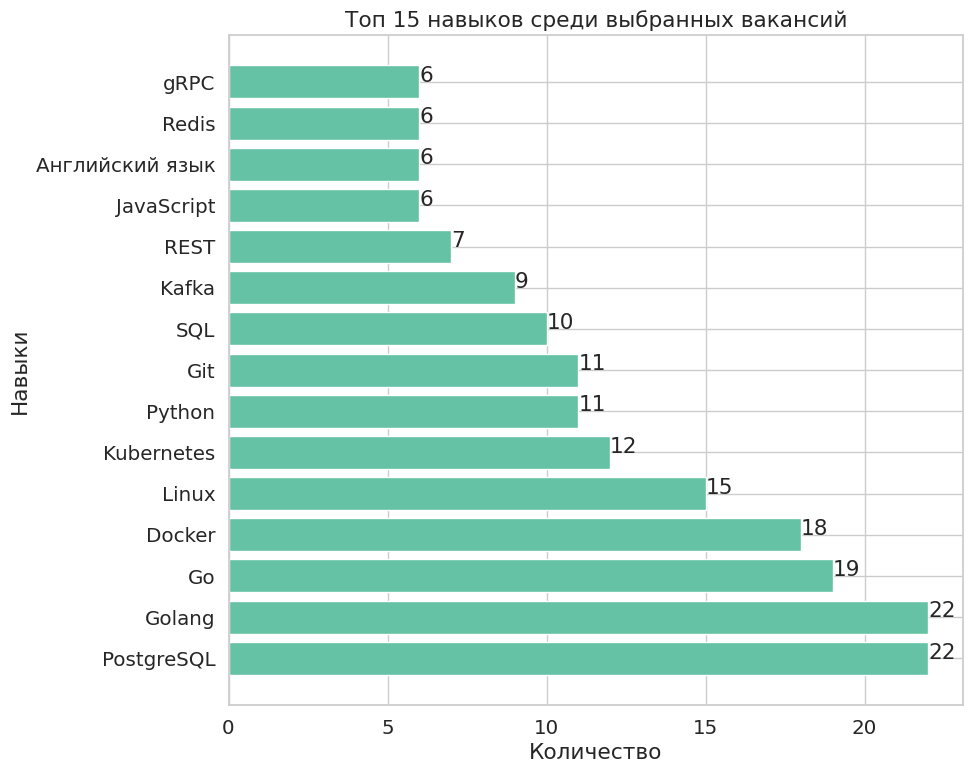

In [31]:
dicts = {}

for cur_skills in key_skills:
  if cur_skills == None:
    continue
  for skill in cur_skills:
    skill_name = skill['name']
    dicts[skill_name] = dicts.get(skill_name, 0) + 1
top_15 = sorted(dicts.items(), key=lambda x: x[1], reverse=True)[:15]
keys = []
values = []
for key, val in top_15:
  keys.append(key)
  values.append(val)
plt.figure(figsize=(10, 8))
bars = plt.barh(keys, values)
plt.xlabel('Количество')
plt.ylabel('Навыки')
plt.title('Топ 15 навыков среди выбранных вакансий')
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{values[i]}')

plt.tight_layout()
plt.show()

Из графика можно сделать выводы какие навыки больше всего ценят работодатели:
1) работу с SQL
2) Go - сам язык
3) Docker
4) Вспомогательные языки и технологии

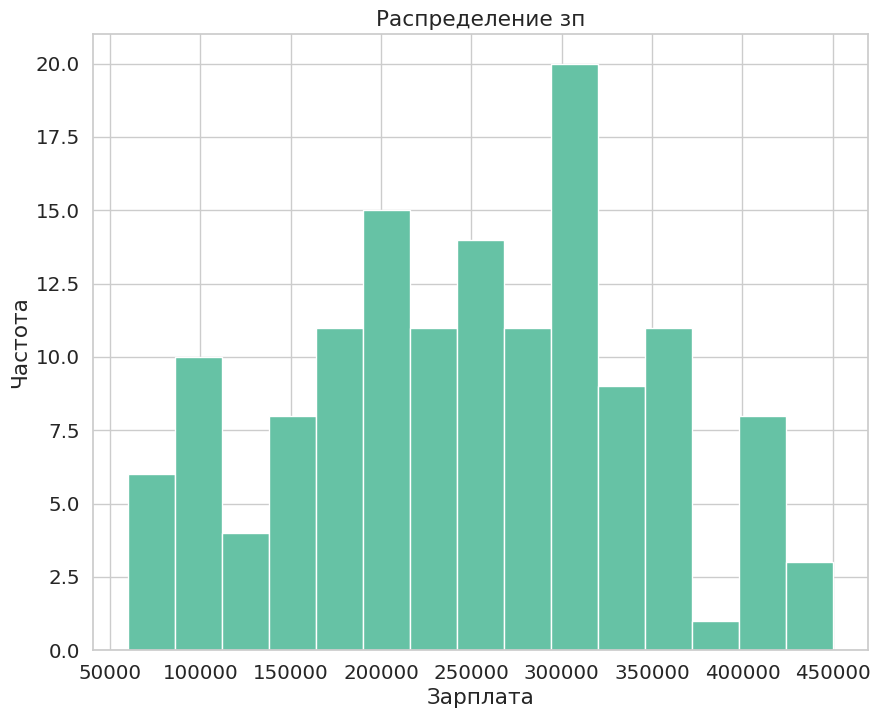

In [32]:
df2 = use_for_analyze.dropna(subset=['from', 'currency']).copy()
df2['salary'] = df2.apply(lambda row: (row['from'] + row['to']) / 2 if pd.notnull(row['to']) and pd.notnull(row['from']) else row['from'] if pd.notnull(row['from']) else row['to'], axis=1)
df_with_salary = df2.dropna(subset=['salary']).copy()
df_filtr = df_with_salary[(df_with_salary['salary'] > 50_000) & (df_with_salary['salary'] < 500_000)]
plt.figure(figsize=(10, 8))
plt.hist(df_filtr['salary'], bins=15)
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.title('Распределение зп')
plt.grid(True)
plt.show()

Из графика можно увидеть что средняя зарплата выше чем у Data Science специалиста и есть также вакансии на большие зарплаты, да было проанализировано меньшее количество вакансий, но достаточно большое чтобы сделать выводы. Это подтверждает нашу гипотезу, что меньше вакансий для начинающих, больше для спецов.

In [33]:
dict = {}
for cur in schedules:
  if cur == None:
    continue
  id = cur['id']
  dict[id] = dict.get(id, 0) + 1
top = sorted(dict.items(), key=lambda x: x[1], reverse=True)
shedule = len(top)
keys = []
values = []
for key, val in top:
  print(key)
  keys.append(key)
  values.append(val)

fullDay
remote
flexible


В отличии от аналитика/data science, здесь доступно меньше видов работы.

Исходя из графиков полученной зарплаты по направлению data science | ад и Go разработчик можно сделать вывод, что на рынке ощущается нехватка по 1 направлению, и компании готовы рассматривать молодых специалистов на перспективу, в отличии от разработчика. Там ситуация противоположная, рынок нуждается в специалистках, а количество вакансий значительно меньше, что говорит о высоком пороге входа, что необходимо большой опыт. Анализ производился по количеству вакансий и количеству предложений по зарплате на определенную сумму.